# 1. For Chromagram

### Installing Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import SGDClassifier

### Reading Data

In [2]:
chroma = pd.read_csv(r"data\chromagram.csv")
chroma = chroma.drop(columns=['Genre'])
chroma

,C (C# / Db),C# (D♭ / B♭),D,D# (E♭),E,F,F# (G♭),G,G# (A♭),A,A# (B♭),B
0,0.363934,0.210595,0.228163,0.630021,1.000000,0.936838,0.622386,0.656197,0.770327,0.638823,0.480746,0.483903
1,0.463867,0.811010,0.501662,0.569125,0.700595,1.000000,0.805109,0.582971,0.948419,0.934804,0.841336,0.584974
2,0.406813,1.000000,0.473217,0.462457,0.268383,0.252549,0.479781,0.402129,0.377478,0.531163,0.760763,0.291625
3,0.335539,1.000000,0.391137,0.478910,0.194736,0.135036,0.431765,0.326971,0.189751,0.287179,0.596291,0.136635
4,0.293878,0.978613,0.573593,0.847509,0.304158,0.194047,0.597830,0.305963,0.185818,0.324381,1.000000,0.233187
...,...,...,...,...,...,...,...,...,...,...,...,...
40544,0.450775,0.157748,0.124580,0.309239,0.726258,0.640369,0.503619,0.982327,1.000000,0.841789,0.299171,0.210727
40545,0.387370,0.143668,0.060491,0.074842,0.191104,0.145797,0.138226,0.322731,0.337542,0.835445,1.000000,0.426923
40546,0.356038,0.141734,0.056340,0.036692,0.061573,0.073481,0.071718,0.106300,0.082484,0.167150,1.000000,0.856245
40547,0.359380,0.180374,0.089666,0.044672,0.053212,0.063662,0.063153,0.105165,0.173612,0.081308,0.622870,1.000000


In [3]:
mfccs = pd.read_csv(r'data\MFCCS.csv')
mfccs = mfccs.drop(columns=['Genre'])
mfccs

,MFCCS2,MFCCS1,MFCCS3,MFCCS4,MFCCS5,MFCCS6,MFCCS7,MFCCS8,MFCCS9,MFCCS10,MFCCS11,MFCCS12,MFCCS13,MFCCS14,MFCCS15,MFCCS16,MFCCS17,MFCCS18,MFCCS19,MFCCS20
0,-82.538379,-20.819182,-77.170377,-0.774806,-0.428822,0.112900,0.243659,0.043409,0.026348,0.323914,0.455226,0.014450,-0.662169,-0.801049,-0.143696,0.667632,0.802994,0.196514,-0.429396,-0.461403
1,-44.548495,-37.130033,-30.029846,-2.074488,-19.638752,-11.780397,-0.884470,-11.835522,-9.107750,-4.343322,-14.523749,-12.907894,-21.889100,-16.121517,-5.964852,-2.290609,-3.014832,-17.339417,-8.531179,-11.185791
2,-36.122419,-38.565193,-5.675943,13.831146,-22.229180,-8.514397,-7.634006,-5.748925,-10.352011,-8.238277,-12.349607,-8.171220,-15.853426,-15.217999,-3.774666,-6.012738,-3.780430,-21.194672,-9.659815,-14.625695
3,-32.498149,-34.827164,-4.571852,24.558895,-17.288970,-12.130127,-12.954552,-6.830247,-9.157953,-10.039587,-11.099339,-9.289801,-12.998034,-11.540025,-3.927628,-7.778324,-5.322074,-16.421402,-6.785910,-13.096530
4,-32.170577,-29.357154,-11.709115,32.440964,-6.432176,-18.960820,-19.536228,-11.205974,0.906303,-6.905530,-13.888140,-13.754463,-18.625702,-5.513802,2.133564,-8.422679,-11.495544,-14.253121,-2.729089,-5.824730
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40544,-6.576997,51.216080,-18.051332,-10.933138,-22.801296,-7.709180,-4.270202,0.272344,-8.853046,8.138767,5.197776,-1.749602,-22.044106,-9.742417,-7.142367,3.386284,-1.277248,0.558268,-11.457501,-9.283148
40545,-5.018637,34.431420,-18.806923,-8.952702,-15.589443,7.380170,13.821352,14.582947,-6.140523,6.407661,-6.985155,-15.272321,-22.283894,2.561876,10.069037,15.272973,4.709692,-4.708959,-18.386036,-14.492383
40546,4.212740,12.083229,-25.742655,-2.664504,-2.589310,14.486919,13.462833,13.860022,-10.082342,7.333518,-13.646028,-16.767010,-15.289425,17.369959,20.156519,10.860998,-6.656645,-12.298542,-16.698053,-12.718762
40547,9.265132,-3.521982,-42.557518,1.067693,10.085733,13.897348,12.329644,14.543528,-17.453018,7.976298,-14.907513,-13.056038,-3.717424,15.890601,17.256994,0.648106,-15.973786,-11.243152,-8.638395,-14.620360


In [4]:
rms = pd.read_csv(r'data\rms.csv')
rms

,rms,Genre
0,0.008217,Pop
1,0.025172,Pop
2,0.034822,Pop
3,0.039669,Pop
4,0.044577,Pop
...,...,...
40544,0.275925,Funk
40545,0.273400,Funk
40546,0.270185,Funk
40547,0.238857,Funk


In [5]:
all_merged = pd.concat([chroma,mfccs,rms], axis=1)

In [6]:
all_merged

,C (C# / Db),C# (D♭ / B♭),D,D# (E♭),E,F,F# (G♭),G,G# (A♭),A,...,MFCCS13,MFCCS14,MFCCS15,MFCCS16,MFCCS17,MFCCS18,MFCCS19,MFCCS20,rms,Genre
0,0.363934,0.210595,0.228163,0.630021,1.000000,0.936838,0.622386,0.656197,0.770327,0.638823,...,-0.662169,-0.801049,-0.143696,0.667632,0.802994,0.196514,-0.429396,-0.461403,0.008217,Pop
1,0.463867,0.811010,0.501662,0.569125,0.700595,1.000000,0.805109,0.582971,0.948419,0.934804,...,-21.889100,-16.121517,-5.964852,-2.290609,-3.014832,-17.339417,-8.531179,-11.185791,0.025172,Pop
2,0.406813,1.000000,0.473217,0.462457,0.268383,0.252549,0.479781,0.402129,0.377478,0.531163,...,-15.853426,-15.217999,-3.774666,-6.012738,-3.780430,-21.194672,-9.659815,-14.625695,0.034822,Pop
3,0.335539,1.000000,0.391137,0.478910,0.194736,0.135036,0.431765,0.326971,0.189751,0.287179,...,-12.998034,-11.540025,-3.927628,-7.778324,-5.322074,-16.421402,-6.785910,-13.096530,0.039669,Pop
4,0.293878,0.978613,0.573593,0.847509,0.304158,0.194047,0.597830,0.305963,0.185818,0.324381,...,-18.625702,-5.513802,2.133564,-8.422679,-11.495544,-14.253121,-2.729089,-5.824730,0.044577,Pop
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40544,0.450775,0.157748,0.124580,0.309239,0.726258,0.640369,0.503619,0.982327,1.000000,0.841789,...,-22.044106,-9.742417,-7.142367,3.386284,-1.277248,0.558268,-11.457501,-9.283148,0.275925,Funk
40545,0.387370,0.143668,0.060491,0.074842,0.191104,0.145797,0.138226,0.322731,0.337542,0.835445,...,-22.283894,2.561876,10.069037,15.272973,4.709692,-4.708959,-18.386036,-14.492383,0.273400,Funk
40546,0.356038,0.141734,0.056340,0.036692,0.061573,0.073481,0.071718,0.106300,0.082484,0.167150,...,-15.289425,17.369959,20.156519,10.860998,-6.656645,-12.298542,-16.698053,-12.718762,0.270185,Funk
40547,0.359380,0.180374,0.089666,0.044672,0.053212,0.063662,0.063153,0.105165,0.173612,0.081308,...,-3.717424,15.890601,17.256994,0.648106,-15.973786,-11.243152,-8.638395,-14.620360,0.238857,Funk


In [7]:
all_merged.describe()

,C (C# / Db),C# (D♭ / B♭),D,D# (E♭),E,F,F# (G♭),G,G# (A♭),A,...,MFCCS12,MFCCS13,MFCCS14,MFCCS15,MFCCS16,MFCCS17,MFCCS18,MFCCS19,MFCCS20,rms
count,40549.000000,40549.000000,40549.000000,40549.000000,40549.000000,40549.000000,40549.000000,40549.000000,40549.000000,40549.000000,...,40549.000000,40549.000000,40549.000000,40549.000000,40549.000000,40549.000000,40549.000000,40549.000000,40549.000000,40549.000000
mean,0.339049,0.329334,0.361748,0.434046,0.434313,0.381911,0.402291,0.380641,0.372245,0.394280,...,0.855553,-2.865166,1.955821,-2.027844,3.351131,-2.275133,3.107530,-2.404446,1.659201,0.224778
std,0.303264,0.293018,0.302964,0.334242,0.336533,0.314047,0.329266,0.315211,0.327415,0.345977,...,11.004879,10.144736,10.226601,9.764007,9.696944,9.850037,9.760946,9.549578,9.730497,0.141380
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-45.680115,-46.023796,-43.284115,-55.053580,-37.318050,-40.337822,-37.753128,-46.302567,-43.689580,0.000000
25%,0.082504,0.076167,0.096202,0.126198,0.128493,0.114088,0.109492,0.105843,0.088670,0.086499,...,-5.966409,-9.198450,-4.565824,-7.981650,-2.729474,-8.557400,-2.688393,-8.341818,-4.402695,0.117021
50%,0.242853,0.240163,0.280457,0.365755,0.362758,0.297129,0.309325,0.293064,0.261422,0.282590,...,1.344340,-2.415541,2.168094,-1.662744,3.256405,-2.067913,2.881297,-2.460930,1.321129,0.214533
75%,0.533519,0.531309,0.569187,0.716946,0.717733,0.599748,0.667785,0.623303,0.620111,0.675486,...,8.233647,3.830892,8.642021,4.260211,9.211194,4.018846,8.592693,3.177507,7.470307,0.315543
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,49.940110,54.503480,56.032700,40.241226,63.641777,49.874400,65.935425,51.713066,50.336760,0.864769


In [8]:
all_merged['Genre'].value_counts()

Genre
Romance    11643
Jazz       10431
Pop         8150
Hip Hop     7625
Rock        1817
Funk         883
Name: count, dtype: int64

In [9]:
all_merged['Genre'] = all_merged['Genre'].replace({'Funk':'1','Rock':'2','Hip Hop':'3','Pop':'4','Jazz':'5','Romance':'6'})

In [10]:
#  if chroma['Genre'][i]=='Funk':
#         arr.append(1)
#     elif chroma['Genre'][i]=='Rock':
#         arr.append(2)
#     elif chroma['Genre'][i]=='Hip Hop':
#         arr.append(3)
#     elif chroma['Genre'][i]=='Pop':
#         arr.append(4)
#     elif chroma['Genre'][i]=='Jazz':
#         arr.append(5)
#     elif chroma['Genre'][i]=='Romance':
#         arr.append(6)

In [11]:
target_df = all_merged['Genre']
all_merged.drop(columns=['Genre'], inplace=True)
all_merged

,C (C# / Db),C# (D♭ / B♭),D,D# (E♭),E,F,F# (G♭),G,G# (A♭),A,...,MFCCS12,MFCCS13,MFCCS14,MFCCS15,MFCCS16,MFCCS17,MFCCS18,MFCCS19,MFCCS20,rms
0,0.363934,0.210595,0.228163,0.630021,1.000000,0.936838,0.622386,0.656197,0.770327,0.638823,...,0.014450,-0.662169,-0.801049,-0.143696,0.667632,0.802994,0.196514,-0.429396,-0.461403,0.008217
1,0.463867,0.811010,0.501662,0.569125,0.700595,1.000000,0.805109,0.582971,0.948419,0.934804,...,-12.907894,-21.889100,-16.121517,-5.964852,-2.290609,-3.014832,-17.339417,-8.531179,-11.185791,0.025172
2,0.406813,1.000000,0.473217,0.462457,0.268383,0.252549,0.479781,0.402129,0.377478,0.531163,...,-8.171220,-15.853426,-15.217999,-3.774666,-6.012738,-3.780430,-21.194672,-9.659815,-14.625695,0.034822
3,0.335539,1.000000,0.391137,0.478910,0.194736,0.135036,0.431765,0.326971,0.189751,0.287179,...,-9.289801,-12.998034,-11.540025,-3.927628,-7.778324,-5.322074,-16.421402,-6.785910,-13.096530,0.039669
4,0.293878,0.978613,0.573593,0.847509,0.304158,0.194047,0.597830,0.305963,0.185818,0.324381,...,-13.754463,-18.625702,-5.513802,2.133564,-8.422679,-11.495544,-14.253121,-2.729089,-5.824730,0.044577
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40544,0.450775,0.157748,0.124580,0.309239,0.726258,0.640369,0.503619,0.982327,1.000000,0.841789,...,-1.749602,-22.044106,-9.742417,-7.142367,3.386284,-1.277248,0.558268,-11.457501,-9.283148,0.275925
40545,0.387370,0.143668,0.060491,0.074842,0.191104,0.145797,0.138226,0.322731,0.337542,0.835445,...,-15.272321,-22.283894,2.561876,10.069037,15.272973,4.709692,-4.708959,-18.386036,-14.492383,0.273400
40546,0.356038,0.141734,0.056340,0.036692,0.061573,0.073481,0.071718,0.106300,0.082484,0.167150,...,-16.767010,-15.289425,17.369959,20.156519,10.860998,-6.656645,-12.298542,-16.698053,-12.718762,0.270185
40547,0.359380,0.180374,0.089666,0.044672,0.053212,0.063662,0.063153,0.105165,0.173612,0.081308,...,-13.056038,-3.717424,15.890601,17.256994,0.648106,-15.973786,-11.243152,-8.638395,-14.620360,0.238857


In [12]:
scaler = StandardScaler()

In [13]:
scaler.fit(all_merged)

StandardScaler()

In [14]:
all_transformed = scaler.transform(all_merged)

In [15]:
all_tf_df = pd.DataFrame(all_transformed, columns=all_merged.columns)

In [16]:
all_tf_df

,C (C# / Db),C# (D♭ / B♭),D,D# (E♭),E,F,F# (G♭),G,G# (A♭),A,...,MFCCS12,MFCCS13,MFCCS14,MFCCS15,MFCCS16,MFCCS17,MFCCS18,MFCCS19,MFCCS20,rms
0,0.082056,-0.405233,-0.440931,0.586334,1.680946,1.767039,0.668450,0.874204,1.215846,0.706829,...,-0.076431,0.217159,-0.269582,0.192971,-0.276740,0.312503,-0.298235,0.206823,-0.217936,-1.531788
1,0.411586,1.643863,0.461825,0.404141,0.791260,1.968164,1.223396,0.641894,1.759787,1.562332,...,-1.250683,-1.875275,-1.767700,-0.403221,-0.581813,-0.075097,-2.094797,-0.641579,-1.320092,-1.411860
2,0.223450,2.288849,0.367934,0.085004,-0.493064,-0.411926,0.235346,0.068171,0.015983,0.395648,...,-0.820262,-1.280311,-1.679349,-0.178906,-0.965664,-0.152823,-2.489769,-0.759767,-1.673614,-1.343604
3,-0.011576,2.288849,0.097006,0.134230,-0.711906,-0.786117,0.089516,-0.170270,-0.557385,-0.309564,...,-0.921907,-0.998842,-1.319697,-0.194573,-1.147742,-0.309337,-2.000746,-0.458818,-1.516460,-1.309321
4,-0.148952,2.215860,0.699252,1.237032,-0.386756,-0.598210,0.593871,-0.236918,-0.569398,-0.202035,...,-1.327611,-1.553587,-0.730420,0.426204,-1.214192,-0.936090,-1.778605,-0.033996,-0.769131,-1.274602
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40544,0.368413,-0.585591,-0.782835,-0.373406,0.867519,0.823000,0.307744,1.908859,1.917328,1.293481,...,-0.236730,-1.890555,-1.143917,-0.523820,0.003625,0.101309,-0.261173,-0.948017,-1.124556,0.361769
40545,0.159336,-0.633644,-0.994377,-1.074692,-0.722699,-0.751853,-0.801988,-0.183720,-0.105993,1.275144,...,-1.465538,-1.914192,0.059263,1.238941,1.229458,0.709125,-0.800802,-1.673559,-1.659913,0.343915
40546,0.056021,-0.640242,-1.008080,-1.188833,-1.107601,-0.982127,-1.003980,-0.870355,-0.885008,-0.656497,...,-1.601361,-1.224715,1.507278,2.272083,0.774467,-0.444827,-1.578357,-1.496797,-1.477637,0.321176
40547,0.067039,-0.508373,-0.898077,-1.164959,-1.132446,-1.013394,-1.029994,-0.873954,-0.606679,-0.904614,...,-1.264145,-0.084011,1.362618,1.975119,-0.278754,-1.390738,-1.470232,-0.652806,-1.673066,0.099582


In [17]:
all_final = pd.concat([all_tf_df,target_df], axis=1)

Tried without scaling the data but the accuracy was significantly affected
###### Data perfomed better with scaling.

In [18]:
# all_final = pd.concat([all_merged,target_df], axis=1)

In [19]:
all_final

,C (C# / Db),C# (D♭ / B♭),D,D# (E♭),E,F,F# (G♭),G,G# (A♭),A,...,MFCCS13,MFCCS14,MFCCS15,MFCCS16,MFCCS17,MFCCS18,MFCCS19,MFCCS20,rms,Genre
0,0.082056,-0.405233,-0.440931,0.586334,1.680946,1.767039,0.668450,0.874204,1.215846,0.706829,...,0.217159,-0.269582,0.192971,-0.276740,0.312503,-0.298235,0.206823,-0.217936,-1.531788,4
1,0.411586,1.643863,0.461825,0.404141,0.791260,1.968164,1.223396,0.641894,1.759787,1.562332,...,-1.875275,-1.767700,-0.403221,-0.581813,-0.075097,-2.094797,-0.641579,-1.320092,-1.411860,4
2,0.223450,2.288849,0.367934,0.085004,-0.493064,-0.411926,0.235346,0.068171,0.015983,0.395648,...,-1.280311,-1.679349,-0.178906,-0.965664,-0.152823,-2.489769,-0.759767,-1.673614,-1.343604,4
3,-0.011576,2.288849,0.097006,0.134230,-0.711906,-0.786117,0.089516,-0.170270,-0.557385,-0.309564,...,-0.998842,-1.319697,-0.194573,-1.147742,-0.309337,-2.000746,-0.458818,-1.516460,-1.309321,4
4,-0.148952,2.215860,0.699252,1.237032,-0.386756,-0.598210,0.593871,-0.236918,-0.569398,-0.202035,...,-1.553587,-0.730420,0.426204,-1.214192,-0.936090,-1.778605,-0.033996,-0.769131,-1.274602,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40544,0.368413,-0.585591,-0.782835,-0.373406,0.867519,0.823000,0.307744,1.908859,1.917328,1.293481,...,-1.890555,-1.143917,-0.523820,0.003625,0.101309,-0.261173,-0.948017,-1.124556,0.361769,1
40545,0.159336,-0.633644,-0.994377,-1.074692,-0.722699,-0.751853,-0.801988,-0.183720,-0.105993,1.275144,...,-1.914192,0.059263,1.238941,1.229458,0.709125,-0.800802,-1.673559,-1.659913,0.343915,1
40546,0.056021,-0.640242,-1.008080,-1.188833,-1.107601,-0.982127,-1.003980,-0.870355,-0.885008,-0.656497,...,-1.224715,1.507278,2.272083,0.774467,-0.444827,-1.578357,-1.496797,-1.477637,0.321176,1
40547,0.067039,-0.508373,-0.898077,-1.164959,-1.132446,-1.013394,-1.029994,-0.873954,-0.606679,-0.904614,...,-0.084011,1.362618,1.975119,-0.278754,-1.390738,-1.470232,-0.652806,-1.673066,0.099582,1


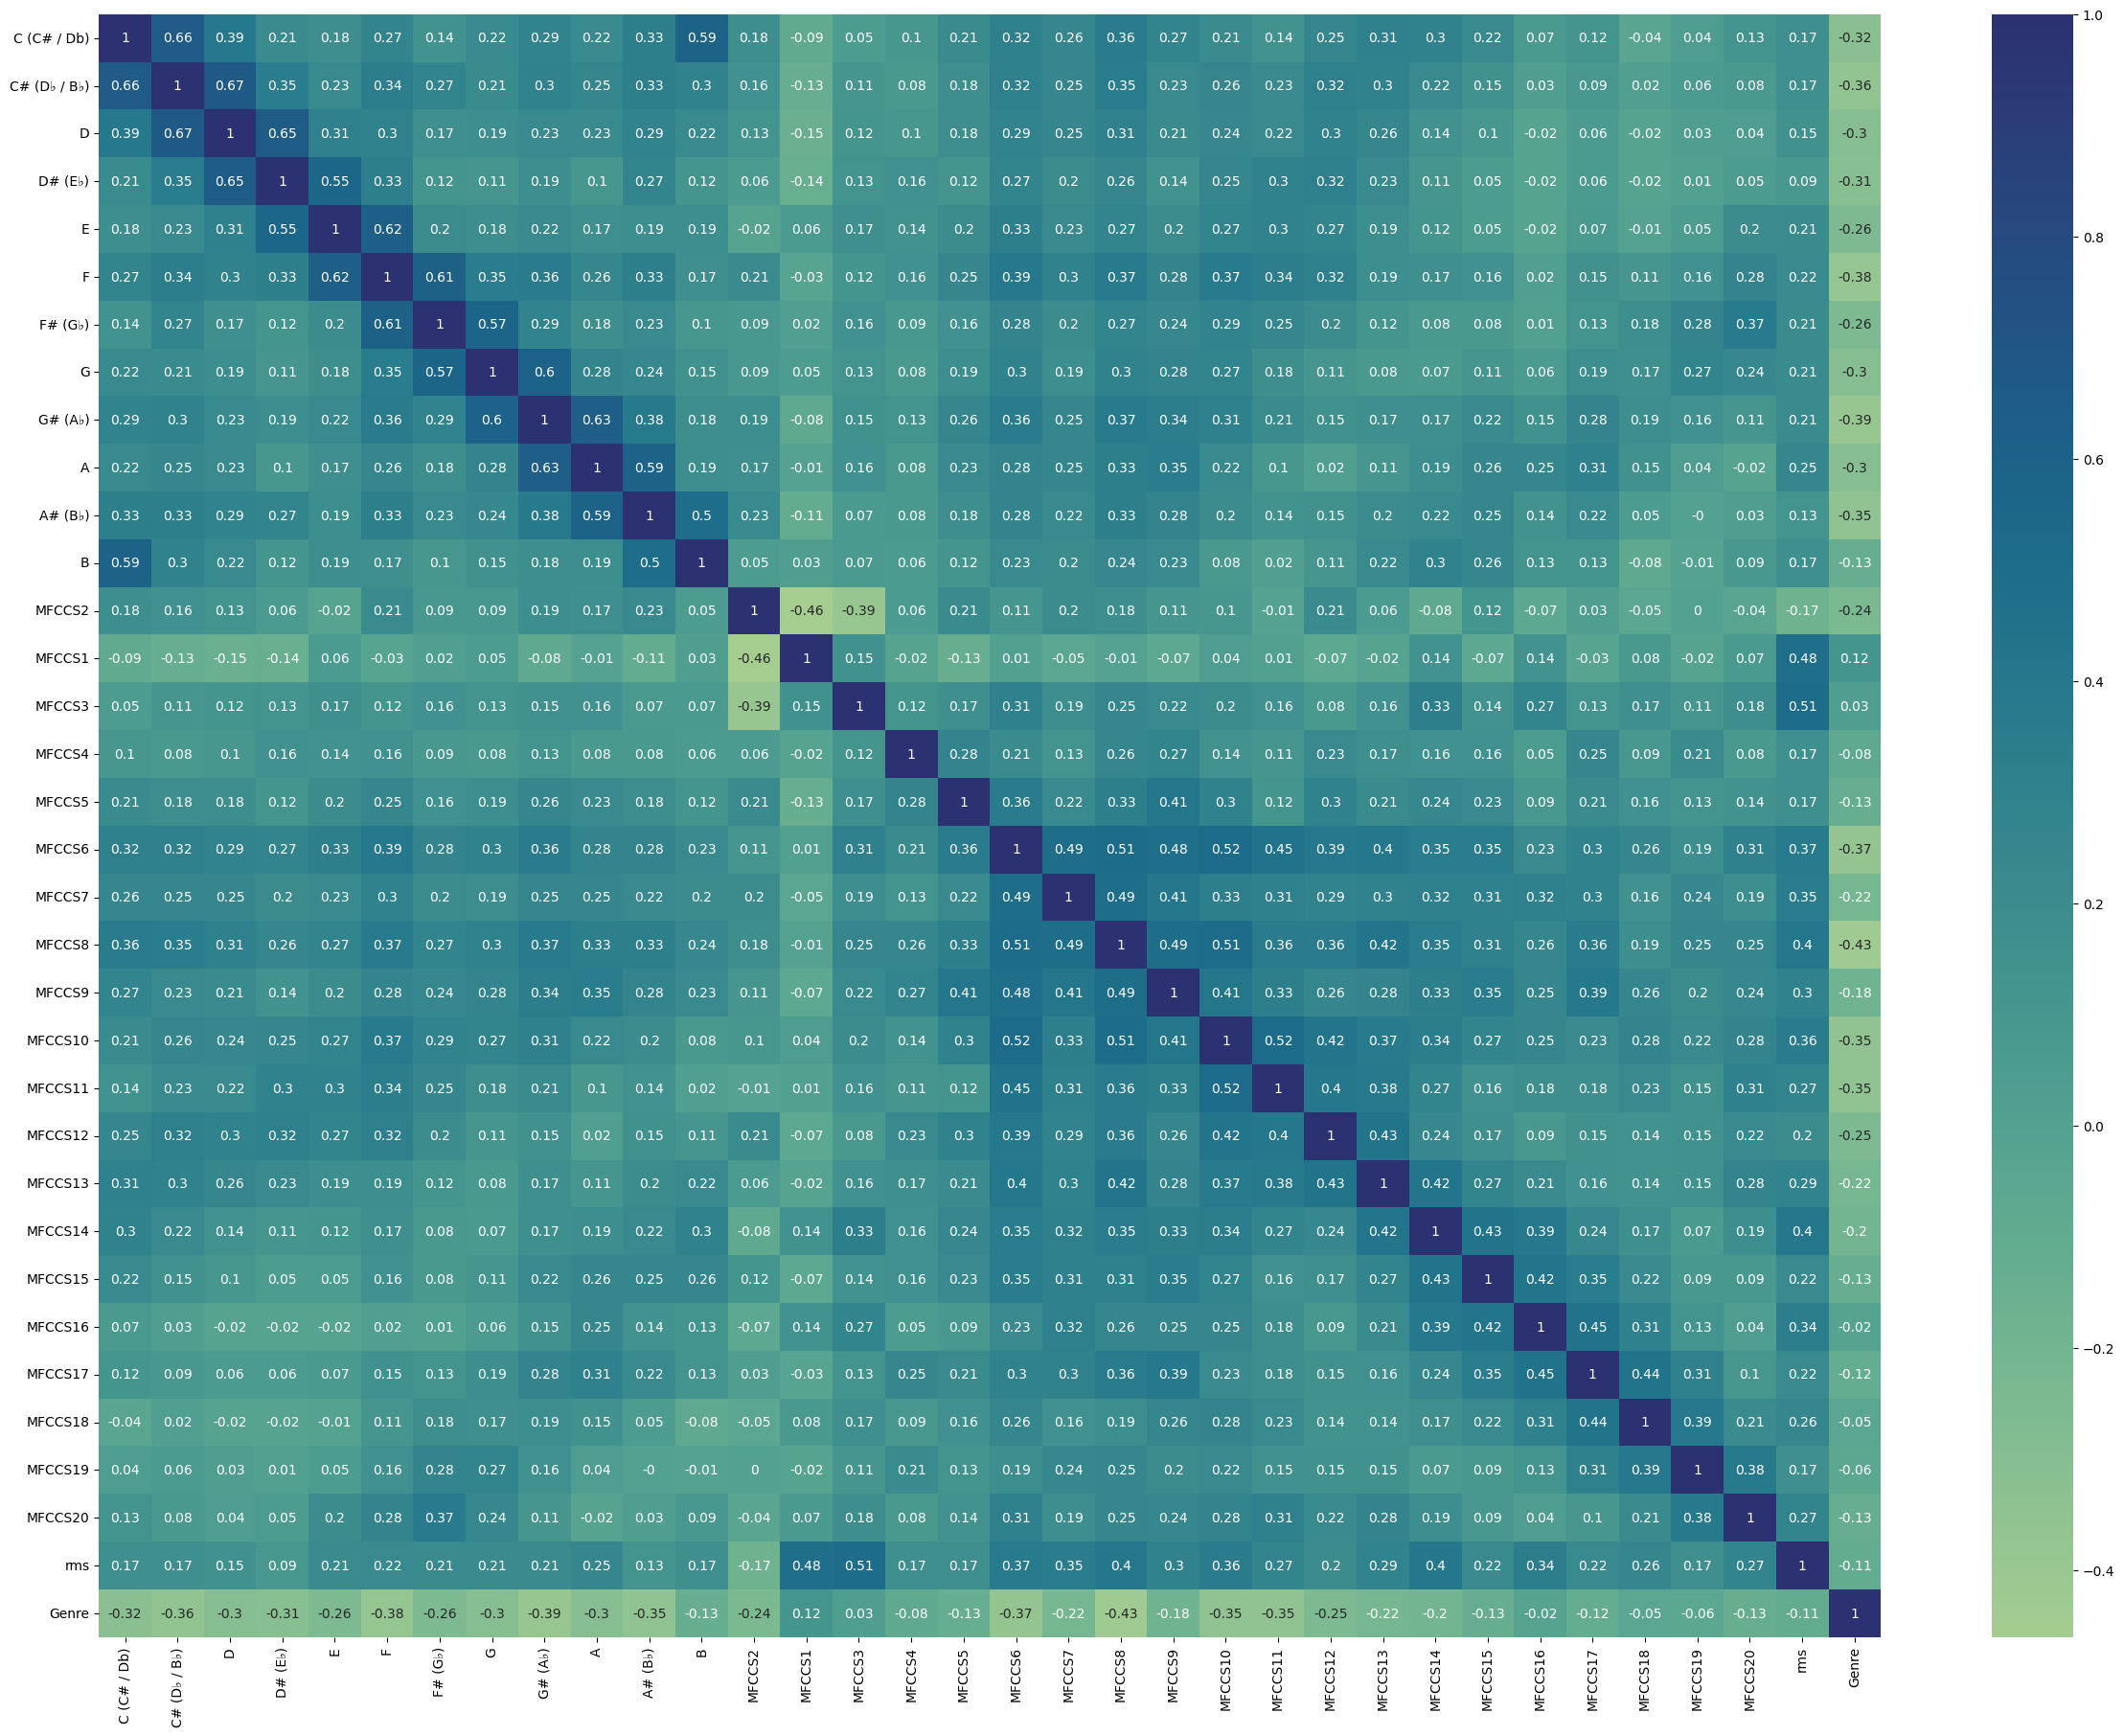

<Figure size 640x480 with 0 Axes>

In [20]:
corr_m = all_final.corr()
plt.figure(figsize=(30,22))
sns.heatmap(round(corr_m,2), annot=True, cmap='crest')
plt.show()
plt.clf()

Train and Test Split

In [21]:
x = all_final.drop(['Genre'], axis=1)
y = all_final['Genre']
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=42)

### ML algorithms

In [22]:
svm_clf = SVC(random_state=42)
svm_clf.fit(x_train, y_train)
cross_val_score(svm_clf, x_train, y_train, cv = 3, scoring='accuracy')

array([0.97790273, 0.97879057, 0.98125678])

##### Support Vector Machines yielded accuracy of about 98% 

In [23]:
dtc = DecisionTreeClassifier(max_depth=13)
dtc.fit(x_train, y_train)
cross_val_score(dtc, x_train, y_train, cv = 6, scoring='accuracy')

array([0.89978299, 0.89130006, 0.89938844, 0.89423836, 0.90094712,
       0.91022099])

##### Decision Tree Classifier yielded accuracy of about 90%

In [24]:
rf = RandomForestClassifier(n_estimators=100)
rf.fit(x_train, y_train)
cross_val_score(rf, x_train, y_train, cv = 3, scoring='accuracy')

array([0.96044195, 0.95935681, 0.96251356])

##### Random Forest Classifier yielded accuracy of about 96%

In [25]:
sgdc = SGDClassifier(random_state=42)
sgdc.fit(x_train, y_train)
cross_val_score(sgdc, x_train, y_train, cv = 6, scoring='accuracy')

array([0.87354508, 0.86900769, 0.87413691, 0.87036306, 0.8792423 ,
       0.87352013])

##### SGDClassifier yielded accuracy of about 87%

In [26]:
dtr_r = DecisionTreeRegressor(max_depth=9)
dtr_r.fit(x_train, y_train)
y_pred = dtr_r.predict(x_test)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(rmse)
train_score = dtr_r.score(x_train, y_train)
print(train_score)
test_score = dtr_r.score(x_test, y_test)
print(test_score)


0.7970833852812206
0.7446433320286079
0.6324126368677274


C:\Users\Karandeep Singh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


##### Decision Tree Regressor yielded RMSE of 0.79 with training and testing R2 scores of 0.74 and 0.63 respectively

In [27]:
rf_r = RandomForestRegressor()
rf_r.fit(x_train, y_train)
y_pred_rf = rf_r.predict(x_test)
rmse = mean_squared_error(y_test, y_pred_rf, squared=False)
print(rmse)
train_score = rf_r.score(x_train, y_train)
print(train_score)
test_score = rf_r.score(x_test, y_test)
print(test_score)


C:\Users\Karandeep Singh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


0.5207715416754808
0.9771093848712755
0.8430911112383691


##### Random Forest Regressor yielded RMSE of 0.52 with training and testing R2 scores of 0.97 and 0.84 respectively

### Therefore best working model was Support Vector Machine (SVM) which was 98% accurate

### Combining (concatenating) all of the features (Chroma, mfccs, rms) into one DataFrame gives an accuracy of 98% with SVM
### Hence, we can use this approach also. 
# --------------------------------------------------------------------------------------------------------

## Changes my approach brought to Bhavya's Model
### - We can use all the features combined instead of depending on just only MFCCS or Chroma.
### - Changes in different Algorithms Used:
#### 1. SVM accuracy increased from 96% to 98%.
#### 2. Decision Tree Classifier accuracy increased from 88% to 90%.
#### 3. Random Forest Classifier accuracy increased from 95% to 96%.
#### 4. SGD Classifier accuracy increased from 79% to 87%.
#### 5. Scores of Random Forest and Decision Tree Regressor has also been improved.